In [1]:
import pandas as pd ; import numpy as np

# Veri Önİşleme Data

# Veri Temizleme (Data cleaning/ Cleasing)
### Gürültülü Veri(Noise Data)
### Eksik Veri(Missing Data Analysis)
### Aykırı Gözlem Analizi(Outlier Analysis)

# Veri Standardizasyonu(Data Standardazation,Feature Scaling)
### 0-1 Dönüşüm,ü(Normalization) 
### Z-Skoruna Dönüştürme(Standardization)
### Logaritmik Dönüşüm(Log Transformation)

# Veri İndirgeme(Data Reduction)
### Gözlem(Observation) Sayısının Azaltılması
### Değişken(Variable) Sayısının Azaltılması

# Değişken Dönüşümleri(Variable Transformation)
### Sürekli Değişkenlerde Dönüşümler
### Kategorik Değişkenlerde Dönüşümler

*********************************
## 1-Aykırı Gözlem(Outlier)

Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir

In [2]:
import seaborn as sns

In [3]:
df = sns.load_dataset("diamonds")

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
df = df.select_dtypes(include=["float64","int64"])

In [7]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.dropna(inplace=True)

Veri dağılımına bakıyoruz

<Axes: xlabel='table'>

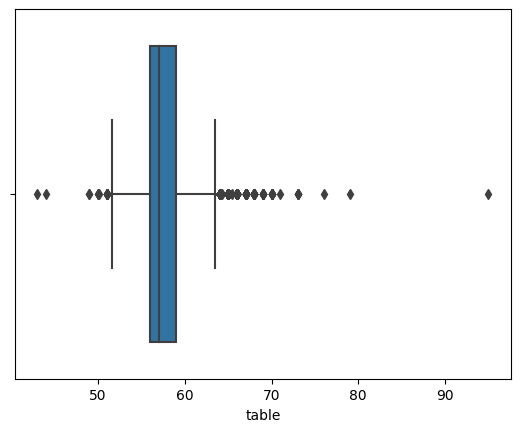

In [9]:
df_table = df["table"]
sns.boxplot(x=df_table)

eşik değer belirliyeceğiz ve aykırı değerleri atacağız

In [10]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [11]:
Q1

56.0

In [12]:
Q3

59.0

In [13]:
IQR

3.0

In [14]:
alt_sinir = Q1-1.5*IQR
ust_sinir = Q3+1.5*IQR

In [15]:
alt_sinir

51.5

In [16]:
ust_sinir

63.5

In [17]:
(df_table< alt_sinir) | (df_table>ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

True dönen kısımlar bizim aykırı değerlerimiz oluyor.

In [18]:
aykiri_tf = (df_table< alt_sinir)

In [19]:
aykiri_tf

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [20]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [21]:
df_table[aykiri_tf].index

Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701, 25179,
       26387, 33586, 35633, 45798, 46040, 47630],
      dtype='int64')

In [22]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [23]:
df_table[(df_table< alt_sinir) | (df_table>ust_sinir)]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [24]:
df_table_index = df_table[(df_table< alt_sinir) | (df_table>ust_sinir)].index

In [25]:
df_table_index

Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,   359,
       ...
       53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757, 53785],
      dtype='int64', length=605)

In [26]:
len(df_table[(df_table< alt_sinir) | (df_table>ust_sinir)])

605

In [27]:
df_table = pd.DataFrame(df_table)

## Aykırı gözlemi çıkartmak

In [28]:
t_df = df_table[~((df_table<alt_sinir) | (df_table>ust_sinir)).any(axis = 1)]

In [29]:
t_df.shape

(53335, 1)

In [30]:
df_table.shape

(53940, 1)

In [31]:
df_table.shape[0]-t_df.shape[0]

605

In [32]:
df_table = df_table[((df_table>alt_sinir) & (df_table<ust_sinir)).any(axis = 1)]

In [33]:
df_table.shape

(53334, 1)

## Aykırı gözlemi baskılama ile doldurmak

In [34]:
type(df_table)

pandas.core.frame.DataFrame

In [35]:
ust =  (df_table>ust_sinir)
alt =  (df_table<alt_sinir)

In [36]:
df_table[alt] = alt_sinir

In [37]:
df_table[ust] = ust_sinir

In [38]:
df_table[alt]

,table
0,NaN
1,NaN
3,NaN
4,NaN
5,NaN
...,...
53935,NaN
53936,NaN
53937,NaN
53938,NaN


In [39]:
df_table[ust]

,table
0,NaN
1,NaN
3,NaN
4,NaN
5,NaN
...,...
53935,NaN
53936,NaN
53937,NaN
53938,NaN


In [40]:
df_table[((df_table>alt_sinir) & (df_table<ust_sinir)).all(axis=1)] = df_table.mean()

In [41]:
df_table[(df_table>alt_sinir) & (df_table<ust_sinir)]

,table
0,57.373289
1,57.373289
3,57.373289
4,57.373289
5,57.373289
...,...
53935,57.373289
53936,57.373289
53937,57.373289
53938,57.373289


## Çok Değişkenli Aykırı Gözlem

## Local Outlier Factor
 Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.
 


In [42]:
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(include=["float64","int64"])
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [43]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [44]:
clf = LocalOutlierFactor(n_neighbors=20,contamination=0.1)

In [45]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [46]:
clf

LocalOutlierFactor(contamination=0.1)

Şuan yoğunluk tabanlı skor puanları oluşmuş durumda

In [47]:
df_score = clf.negative_outlier_factor_

In [48]:
df_score

array([-1.58352526, -1.59732899, -1.62278873, ..., -1.06721815,
       -1.00809552, -1.00849038])

In [49]:
df_score[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [50]:
np.sort(df_score)[0:50]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375,
       -3.45066056, -3.42193513, -3.40044967, -3.36779427, -3.35007989,
       -3.32557427, -3.29322345, -3.22070216, -3.19253942, -3.17216736,
       -3.16270895, -3.0900127 , -3.08096113, -3.07879797, -3.06943824,
       -3.0581048 , -3.03756565, -3.02610611, -2.96150262, -2.92133335,
       -2.8910913 , -2.87232591, -2.86404215, -2.85995025, -2.80025433,
       -2.7948162 , -2.79239569, -2.78583061, -2.77804997, -2.76102085])

In [51]:
esik_deger = np.sort(df_score)[13]

In [52]:
aykiri_tf = df_score> esik_deger

In [53]:
len(aykiri_tf)

53940

In [54]:
len(df_score)

53940

In [55]:
df_yeni = df[aykiri_tf]

In [56]:
len(df_yeni)

53926

In [57]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


tek değişkenli outlier analizine göre daha az sonuç ortaya çıktı

# Eksik Veri

Eksik değere sahip gözlemlerin veri setinden direk çıkarılması ve rassallığının incelenmemesi yapılacak istatistiksel çıkarımların , modelleme çalışmalarının güvenirliliğini düşürecektir

Kafamıza göre eksik veriye aksiyon alamıyoruz.

1. Veri setindeki eksikliğin yapısal bir eksiklik olup olmadığının bilinmesi gerekir

In [58]:
"""Örneğin:\n
    Müsteri | kredi_kartı_harcaması  | kredi_kartına_sahip_olma_durumu
    müsteri1| NA                     | 0(sahip değil)"""

'Örneğin:\n\n    Müsteri | kredi_kartı_harcaması  | kredi_kartına_sahip_olma_durumu\n    müsteri1| NA                     | 0(sahip değil)'

2. NA herzaman eksiklik anlamına gelmez!
Yukarıdaki örnekte sadece 3. sütun değeri 0 yerine 1 olsaydı ve harcama NA olsayddı ozaman buraya uygulanması gereken aksiyon NA yerine 0 yazmak olacaktı.

3. Bilgi Kaybı !  100 sütundan oluşan bir satır olsun ve bu sütun bilgilerinden sadece 5 tanesi girilmemiş olsun . ozaman bu satırı silmek mantıklı bir durum değildir.

Bu 3 durum incelendiği taktirde:

rastsallığa göre doldurma ve silme işlemleri yapacağımızı tespit etmemiz gerek

4 teknik üzerinden tespit edilir. Bunlar

Görsel teknikler , Bağımsız iki Örneklem T testi, Korelasyon Testi, Little nin MCAR testi

Genellikle Görsel teknikler ve Little MCAR testi kullanılır

## Eksik veri analizi

### Hızlı Çözüm

In [59]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

In [60]:
df = pd.DataFrame({"V1":V1,"V2":V2,"V3":V3})

In [61]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [62]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

En az bir eksik verinin bulunduğu sutünları almak istersek

In [63]:
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [64]:
df[~df.isnull().any(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [65]:
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [66]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [67]:
df[df["V1"].isnull() | df["V2"].isnull() | df["V3"].isnull()]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [68]:
df.dropna().all(axis=1)

2    True
4    True
7    True
8    True
dtype: bool

In [69]:
df = df[~(df["V1"].isnull() & df["V2"].isnull() & df["V3"].isnull())]

In [70]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


eksik veriyi doldurmak"

In [71]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
7     9.0
8    15.0
Name: V1, dtype: float64

her bir değişkeni tek satırda doldurmak istersek

In [72]:
df = pd.DataFrame({"V1":V1,"V2":V2,"V3":V3})

In [73]:
df.apply(lambda x:x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [74]:
df.fillna(df.mean()[:])# her değ,işken için ortalama değerini atadı

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [75]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [76]:
import missingno as msno
import seaborn as sns

In [77]:
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [78]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

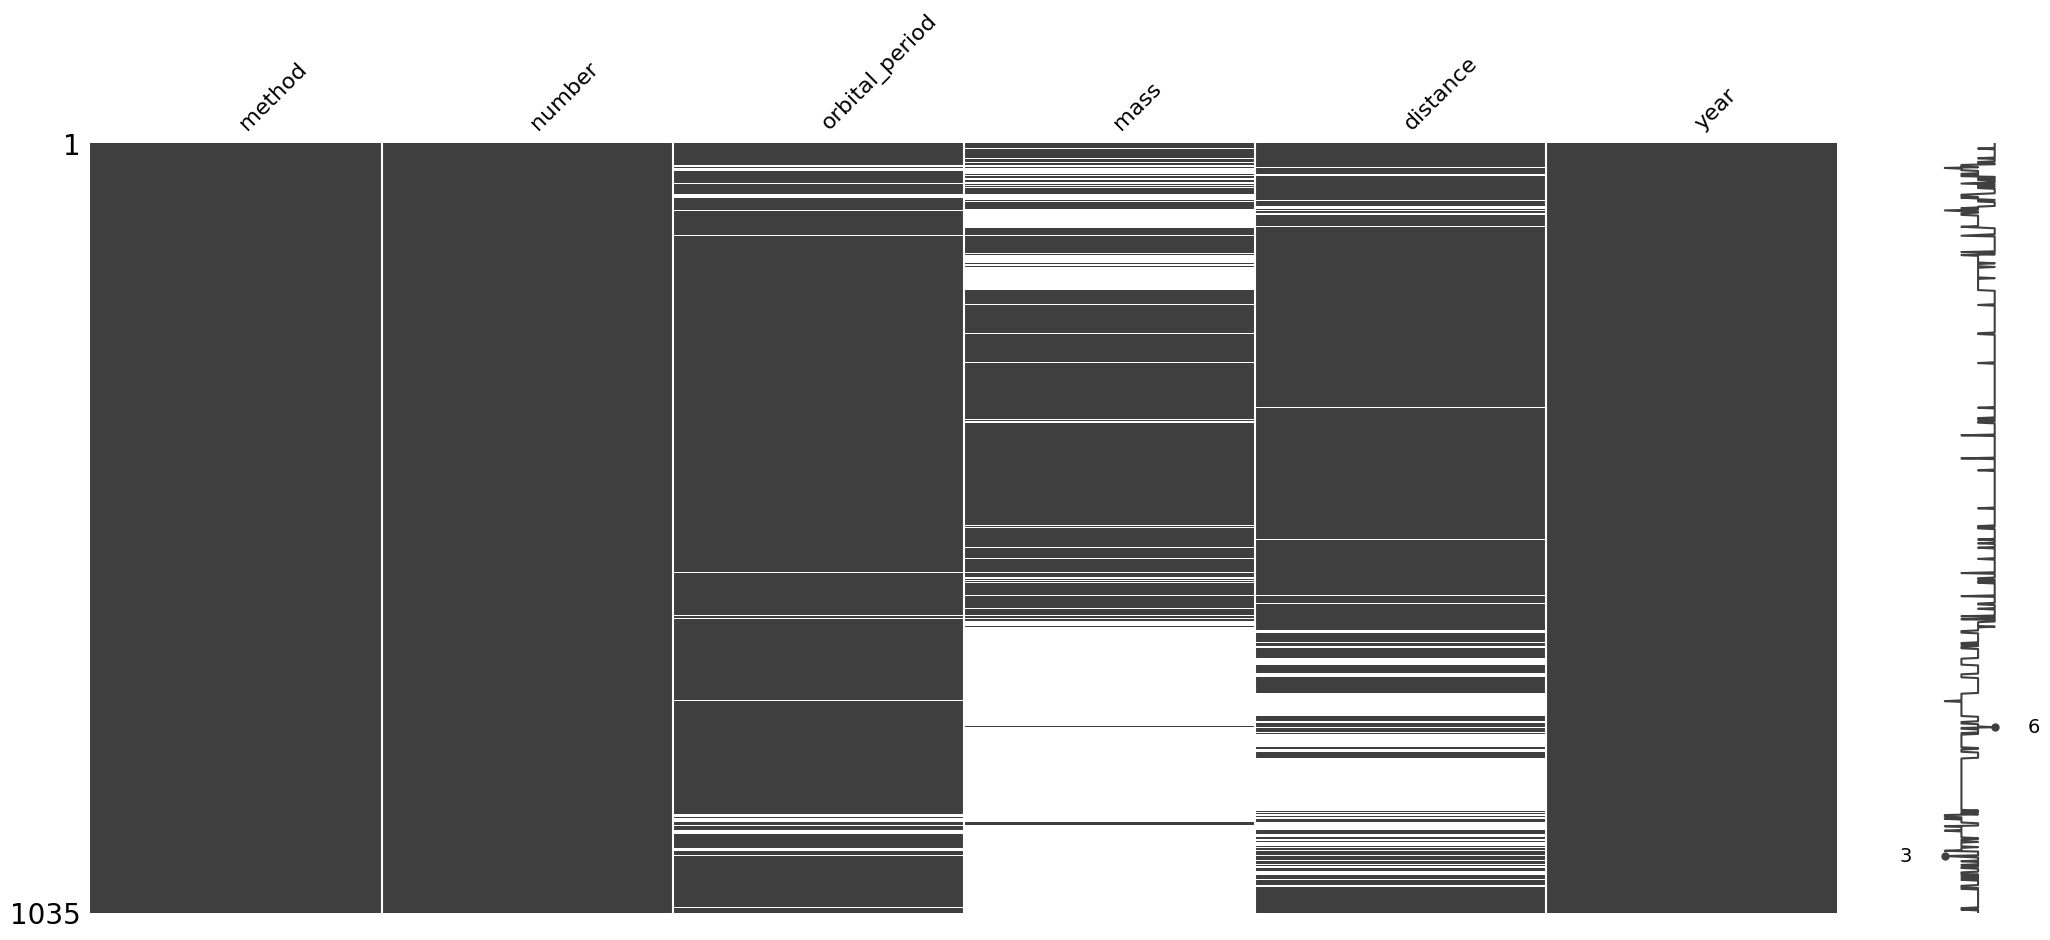

In [79]:
msno.matrix(df);

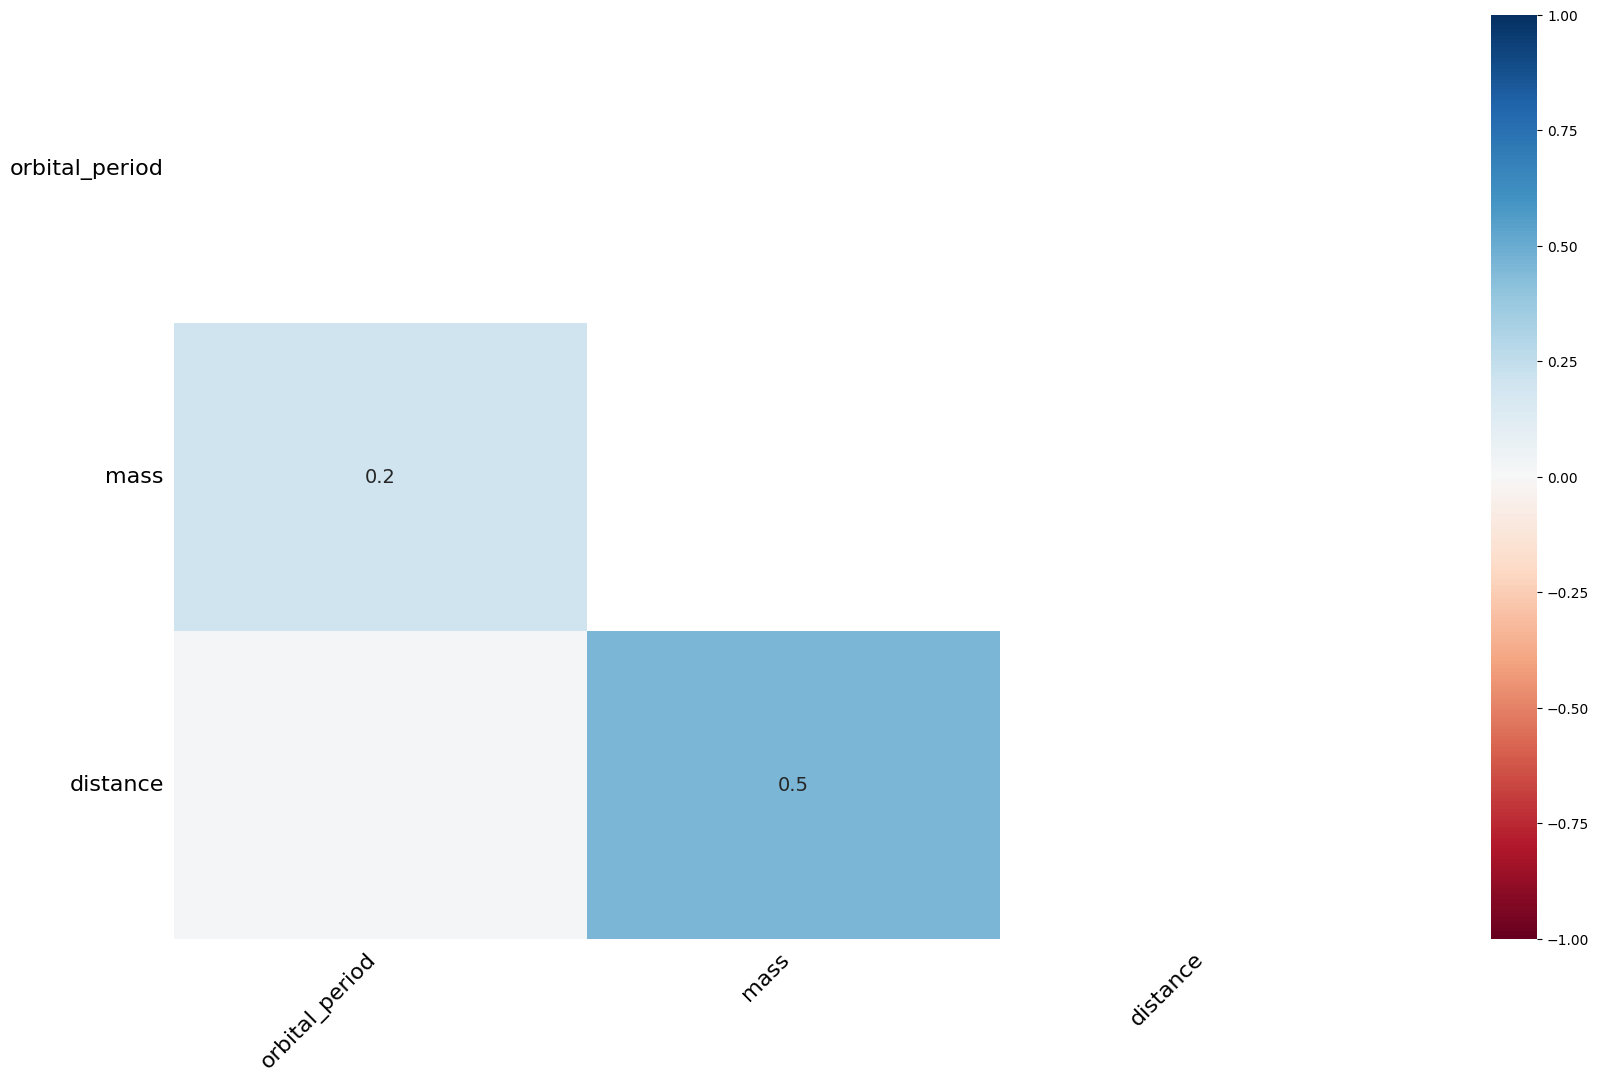

In [80]:
msno.heatmap(df);

Rastsallığa dikkat çekiyoruz. Korelasyon değerleri mevcut . (Korelasyon  değişkenlerin birbirleriyle bağımlılık durumu.)

In [81]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [82]:
data = pd.DataFrame({"V1":V1,"V2":V2,"V3":V3})

In [83]:
data

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [84]:
df.dropna()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


In [85]:
df.dropna(how="all")

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [88]:
data[(data["V1"].isnull() | data["V2"].isnull() |data["V3"].isnull()) ]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [93]:
data["V4"] = range(9)

In [94]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [95]:
df.dropna(axis=1,how="all")

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


## Hızlı Değer Atama

In [96]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [97]:
data["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [100]:
data["V1"].fillna(data["V1"].max())


0     1.0
1     3.0
2     6.0
3    15.0
4     7.0
5     1.0
6    15.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [102]:
data[["V1","V2"]]

,V1,V2
0,1.0,7.0
1,3.0,NaN
2,6.0,5.0
3,NaN,8.0
4,7.0,12.0
5,1.0,NaN
6,NaN,NaN
7,9.0,2.0
8,15.0,3.0


In [103]:
data[["V1","V3"]].apply(lambda x:x.fillna(x.mean()))

,V1,V3
0,1.0,11.0
1,3.0,12.0
2,6.0,5.0
3,6.0,6.0
4,7.0,14.0
5,1.0,7.0
6,6.0,11.0
7,9.0,2.0
8,15.0,31.0
